<a href="https://colab.research.google.com/github/hanifaalwi/bigdata/blob/main/HanifaAlwi_Tugas3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data sebagai tabel
Tabel dasar adalah kisi data dua dimensi, di mana baris mewakili satu per satu elemen set data, dan kolom mewakili jumlah yang terkait dengan  masing-masing elemen-elemen ini. Misalnya, pertimbangkan kumpulan data Iris, yang terkenal dianalisis oleh Ronald Fisher pada tahun 1936. Kita dapat mendownload dataset ini dalam bentuk Pandas DataFrame menggunakan perpustakaan Seaborn:

In [78]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Array target
ciri-ciri biasanya terdiri dri satu dimensi, dengan panjang n_samples, dan umumnya terdapat dalam array NumPy atau Pandas Seri. Array target mungkin memiliki nilai numerik kontinu, atau diskrit kelas / label. Sementara beberapa estimator Scikit-Learn menangani beberapa nilai target di dalam bentuk larik target dua dimensi [n_samples, n_t target], kita akan melakukannya bekerja dengan kasus umum dari larik target satu dimensi. Fitur yang membedakan dari larik target adalah biasanya jumlahnya kita ingin memprediksi dari data: dalam istilah statistik, ini adalah variabel dependen. 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


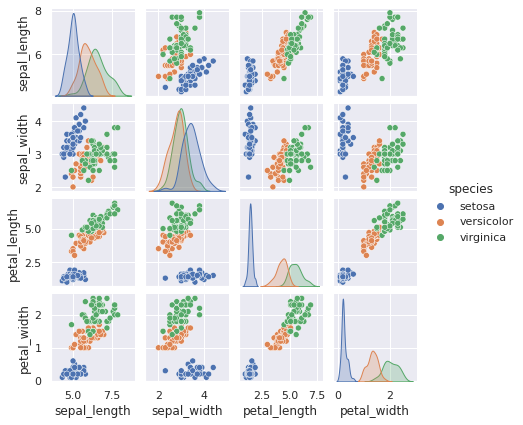

In [79]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

Untuk digunakan di Scikit-Learn, kita akan mengekstrak matriks fitur dan array target dari DataFrame, yang dapat kita lakukan menggunakan beberapa operasi Pandas DataFrame yang dibahas di Bab 3:

In [80]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [81]:
y_iris = iris['species']
y_iris.shape

(150,)

Contoh pembelajaran yang diawasi: Regresi linier sederhana
Sebagai contoh dari proses ini, mari kita pertimbangkan regresi linier sederhana — yaitu, kasus umum pemasangan garis ke data x, y

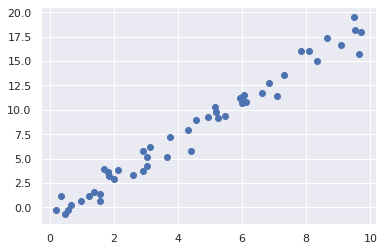

In [82]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

Pilih kelas model.
Dalam Scikit-Learn, setiap kelas model diwakili oleh kelas Python. Maka untuk
Misalnya, jika kita ingin menghitung model regresi linier sederhana, kita bisa impor kelas regresi linier

In [83]:
from sklearn.linear_model import LinearRegression

Pilih hyperparameter model.
Poin penting adalah bahwa kelas model tidak sama dengan instance dari a
model.

In [84]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Menyusun data menjadi matriks fitur dan vektor target.

In [85]:
X = x[:, np.newaxis]
X.shape

(50, 1)

Sesuaikan model dengan data yang kita punya

In [86]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
model.coef_

array([1.9776566])

In [88]:
model.intercept_

-0.9033107255311146

Memprediksi label untuk data yang tidak diketahui.

In [89]:
xfit = np.linspace(-1, 11)

In [90]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

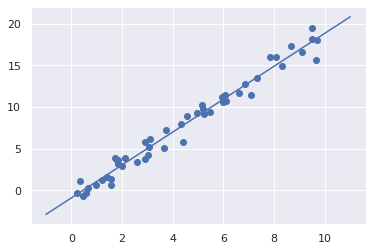

In [91]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

Contoh pembelajaran terbimbing: Klasifikasi iris
untuk mengevaluasi model data yang tidak terlihat sebelumnya membagi data menjadi satu set pelatihan dan satu set pengujian menggunakan fungsi utilitas train_test_split

In [92]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

In [93]:
from sklearn.naive_bayes import GaussianNB # 1. memilih kelas model
model = GaussianNB() # 2. model instan
model.fit(Xtrain, ytrain) # 3. menyesuaikan model ke data
y_model = model.predict(Xtest) # 4. presiksi data baru

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

Contoh pembelajaran tanpa pengawasan: Dimensi iris dengan langkah :

In [95]:
from sklearn.decomposition import PCA # 1. pilih kelas model
model = PCA(n_components=2) # 2. model istans dengan hyperparameters
model.fit(X_iris) # 3. sesuaikan ke data. Perhatian y tidak spesifik!
X_2D = model.transform(X_iris) # 4. rubah data ke 2 dimensi

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


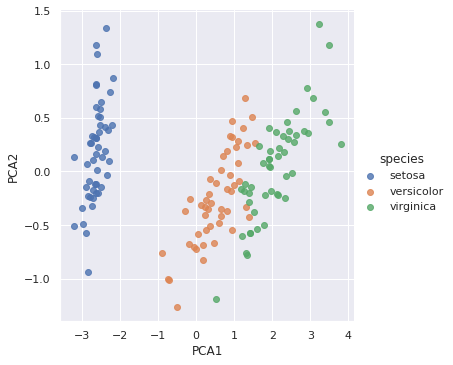

In [96]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

Pembelajaran tanpa pengawasan: Pengelompokan iris
Algoritme pengelompokan mencoba
untuk menemukan kelompok data yang berbeda tanpa mengacu pada label apa pun. Di sini kita akan menggunakan file
metode pengelompokan yang kuat yang disebut model campuran Gaussian (GMM), GMM berfungsi untuk memodelkan data sebagai kumpulan gumpalan Gaussian.

In [97]:
from sklearn.mixture import GaussianMixture # 1. pilih kelas model 
model = GaussianMixture(n_components=3,
            covariance_type='full') # 2. model intans dengan hyperparameters
model.fit(X_iris) # 3. sesuaikan data. perhatian y tidak spesifik!
y_gmm = model.predict(X_iris) # 4. jelaskan label cluster

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


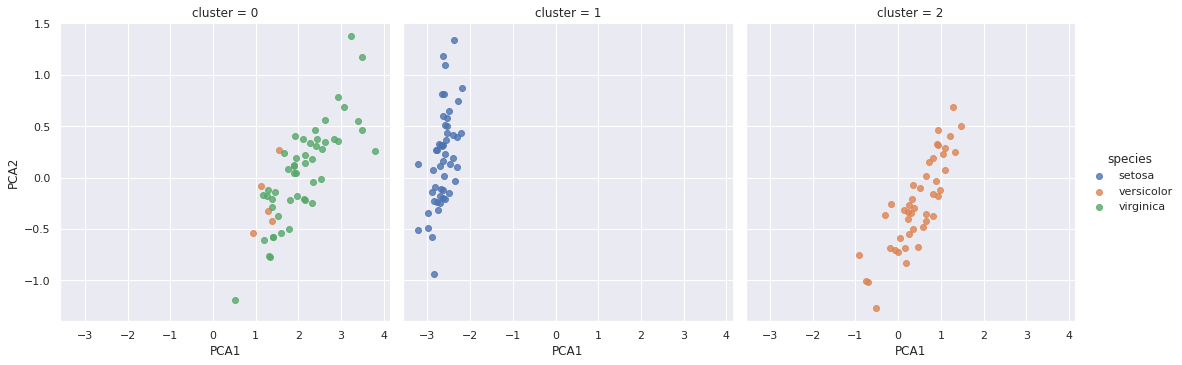

In [98]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
            col='cluster', fit_reg=False);

Memuat dan memvisualisasikan data digit dengan scikit-learns

In [99]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

lalu visualisasikan

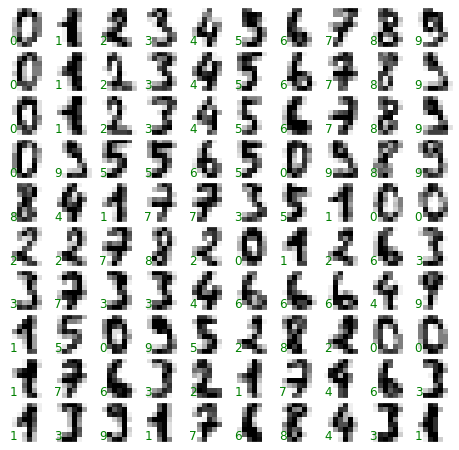

In [100]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

Untuk bekerja dengan data ini dalam Scikit-Learn, kita membutuhkan dua dimensi, Representasi [n_samples, n_features] dengan memperlakukan masing-masing piksel dalam gambar sebagai fitur — yaitu, dengan meratakan array piksel sehingga kita
memiliki array panjang-64 nilai piksel yang mewakili setiap digit. Selain itu, kami membutuhkan larik target, yang memberikan label yang telah ditentukan sebelumnya untuk setiap digit.

In [101]:
X = digits.data
X.shape

(1797, 64)

In [102]:
y = digits.target
y.shape

(1797,)

Pembelajaran tanpa pengawasan: Pengurangan dimensi
kita akan memvisualisasikan poin dalam ruang parameter 64 dimensi, tapi kenyataannya memang demikian
sulit untuk secara efektif memvisualisasikan titik dalam ruang berdimensi tinggi seperti itu. maka, kita akan melakukannya kurangi dimensi menjadi 2, menggunakan metode tanpa pengawasan

In [103]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

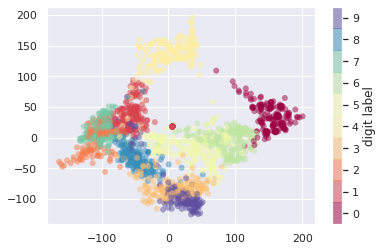

In [122]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

klasifikasi pada digit

In [140]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [141]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [142]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

1.0

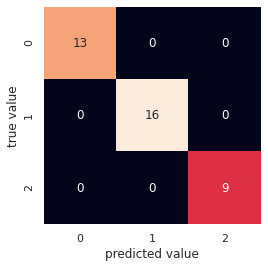

In [143]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

Ini menunjukkan kepada kita di mana titik-titik yang salah diberi label cenderung berada: misalnya, sejumlah besar
dua di sini salah diklasifikasikan sebagai satu atau delapan. Cara lain untuk mendapatkan intuisi
karakteristik model adalah memplot input lagi, dengan label prediksi mereka

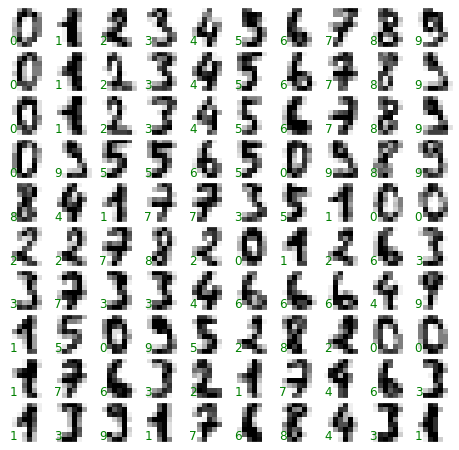

In [149]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                          subplot_kw={'xticks':[], 'yticks':[]},
                          gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
        transform=ax.transAxes, color='green')

validasi model dengan cara yang salah

In [130]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [131]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [132]:
model.fit(X, y)
y_model = model.predict(X)

In [133]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

validasi model yang benar dengan menyeting pengeluaran

In [134]:
from sklearn.model_selection import train_test_split
# lipat data dengan 50% setiap set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)
# sesuaikan model pada set data pertama
model.fit(X1, y1)
# evaluasi model pada set data kedua
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

In [135]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

menggunakan Scikit-Learn’s cross_val_score dengan cara

In [137]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [146]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo.get_n_splits(x)
scores = cross_val_score(model, X, y, cv=loo)
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [147]:
scores.mean()

0.9533333333333334

Kita dapat menggeneralisasi ini ke sejumlah fitur polinomial. Di Scikit-Learn, kami bisa
menerapkan ini dengan regresi linier sederhana yang dikombinasikan dengan preprocessor polinomial.

In [109]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

In [110]:
import numpy as np
def make_data(N, err=1.0, rseed=1):
    # sample data acak
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y
X, y = make_data(40)

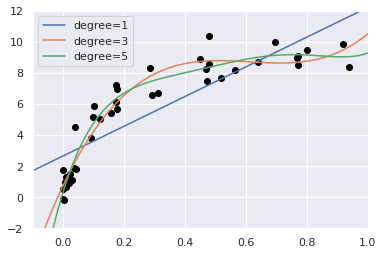

In [111]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # format plot
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

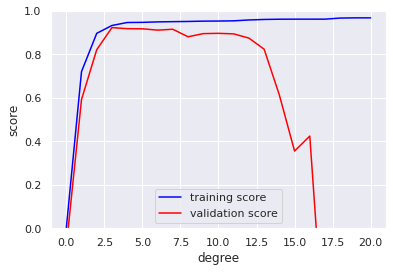

In [112]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree',
                                          degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

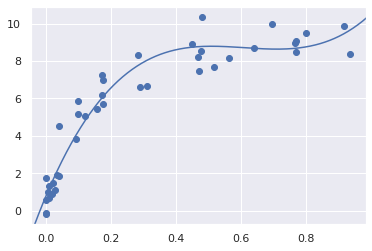

In [120]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

Kurva Pembelajaran
Salah satu aspek penting dari kompleksitas model adalah model yang optimal secara umum
bergantung pada ukuran data pelatihan Anda

In [ ]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

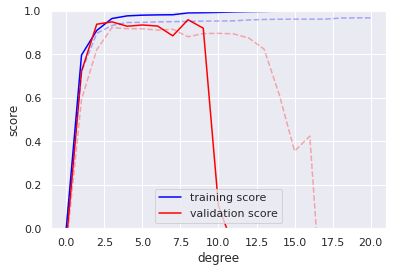

In [119]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            'polynomialfeatures__degree',
                                            degree, cv=7)
plt.plot(degree, np.median(train_score2, 1), color='blue',
        label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3,
        linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3,
        linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

Kurva pembelajaran di Scikit-Learn
Scikit-Learn menawarkan utilitas yang nyaman untuk menghitung kurva pembelajaran seperti itu dari Anda
model; di sini kita akan menghitung kurva pembelajaran untuk dataset asli kita dengan urutan kedua
model polinomial dan polinomial orde sembilan

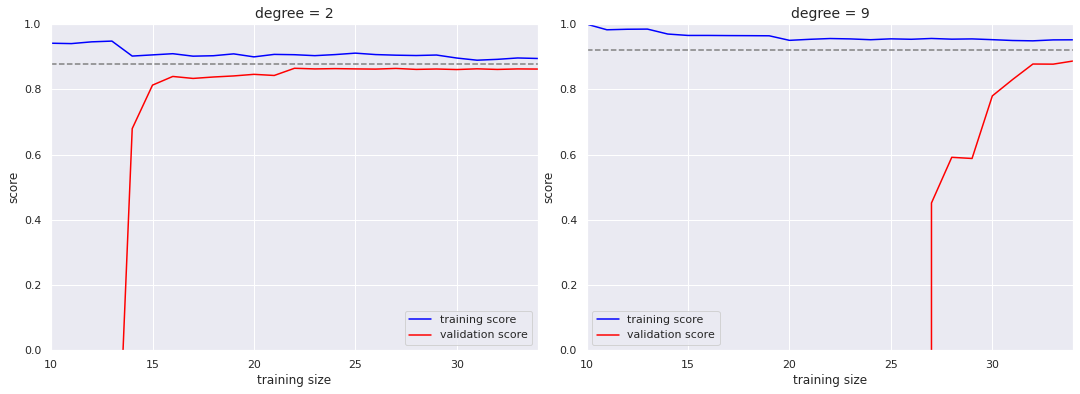

In [117]:
from sklearn.model_selection import learning_curve
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                        X, y, cv=7,
                                        train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray',
                linestyle='dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

praktek validasi berdasarkan pencarian grid

In [152]:
from sklearn.model_selection import GridSearchCV
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [153]:
grid.fit(X, y);

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not broadcast input array from shape (128,4) into shape (128,0)

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not broadcast input array from shape (128,4) into shape (128,0)

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not broadcast input array from shape (128,4) into shape (128,0)

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model

In [154]:
grid.best_params_

{'linearregression__fit_intercept': True,
 'linearregression__normalize': False,
 'polynomialfeatures__degree': 2}

ValueError: ignored

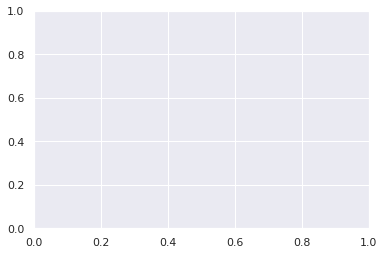

In [155]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

Ringkasan

konsep validasi model dan hyperparameter optimasi, dengan fokus pada aspek intuitif dari trade-off bias-variance dan bagaimana hal itu berperan saat menyesuaikan model dengan data. penggunaan set validasi atau pendekatan validasi silang sangat penting saat menyetel parameter
untuk menghindari overfitting untuk model yang lebih kompleks / fleksibel.